# Análise Estatística — Student Performance

**Arquivo:** `Student_performance_data.csv`

**Link Kaggle** `https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset`

**Objetivo:** Aplicar conceitos de inferência estatística (testes de hipótese e intervalos de confiança via bootstrap ou métodos analíticos) usando Python. Este notebook contém: exploração de dados, formulação de hipóteses, escolha e aplicação de testes, bootstrap para ICs e visualizações.

## Estrutura do notebook

1. Carregar dados
2. Análise exploratória (tipos, valores ausentes, estatísticas)
3. Formulação de hipóteses
4. Testes de hipótese com verificação de pressupostos
5. Intervalos de confiança por bootstrap
6. Visualizações
7. Conclusões

In [33]:
# Imports e carregamento de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

In [34]:
path = 'student_performance_data.csv'
df = pd.read_csv(path)
print('Dados carregados. Shape:', df.shape)
df.head()

Dados carregados. Shape: (2392, 15)


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [35]:
# Exploração inicial
display(df.dtypes.to_frame(name='dtype').assign(n_unique=df.nunique(), n_missing=df.isna().sum()))
print('\nResumo estatístico (numérico):\n')
display(df.describe().T)
print('\nResumo (todas colunas):')
display(df.describe(include='all').T)

print('Colunas:', df.columns.tolist())
possible_score_cols = [c for c in df.columns if any(s in c.lower() for s in ['gpa','grade','score','final','mark'])]
print('Colunas relacionadas a notas encontradas:', possible_score_cols)

if 'GPA' in df.columns:
    df['avg_score'] = df['GPA']
elif possible_score_cols:
    df['avg_score'] = df[possible_score_cols].mean(axis=1)

if 'Gender' in df.columns:
    print('\nContagem por Gender:\n', df['Gender'].value_counts())

display(df.head())

,dtype,n_unique,n_missing
StudentID,int64,2392,0
Age,int64,4,0
Gender,int64,2,0
Ethnicity,int64,4,0
ParentalEducation,int64,5,0
StudyTimeWeekly,float64,2392,0
Absences,int64,30,0
Tutoring,int64,2,0
ParentalSupport,int64,5,0
Extracurricular,int64,2,0



Resumo estatístico (numérico):



,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000



Resumo (todas colunas):


,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


Colunas: ['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']
Colunas relacionadas a notas encontradas: ['GPA', 'GradeClass']

Contagem por Gender:
 Gender
1    1222
0    1170
Name: count, dtype: int64


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,avg_score
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,2.929196
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,3.042915
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0.112602
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,2.054218
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,1.288061


## Formulação das Hipóteses

As hipóteses criadas neste notebook:

- **H1 (diferença entre gêneros):**
  - H0: Não há diferença significativa entre as médias de **GPA** dos dois grupos de `Gender`.
  - H1: Há diferença significativa entre as médias de **GPA** dos dois grupos.

- **H2 (correlação):**
  - H0: Não há correlação entre **StudyTimeWeekly** e **GPA**.
  - H1: Existe correlação significativa entre **StudyTimeWeekly** e **GPA**.

Justificativa: `Gender` possui 2 grupos independentes → teste de duas amostras independentes (t-test ou não-paramétrico). Para correlação entre duas contínuas, Pearson (se normal) ou Spearman (se não-normal).

In [36]:
# Testes de hipótese e bootstrap para ICs
alpha = 0.05
results = {}

In [37]:
if 'Gender' in df.columns:
    unique_g = sorted(df['Gender'].unique())
    if len(unique_g) >= 2:
        gender_map = {unique_g[0]:'Group_0', unique_g[1]:'Group_1'}
        df['gender_label'] = df['Gender'].map(gender_map)

In [38]:
# Testes de hipótese e bootstrap para ICs
alpha = 0.05
results = {}

if 'Gender' in df.columns:
    unique_g = sorted(df['Gender'].unique())
    if len(unique_g) >= 2:
        gender_map = {unique_g[0]:'Group_0', unique_g[1]:'Group_1'}
        df['gender_label'] = df['Gender'].map(gender_map)

if 'gender_label' in df.columns and 'GPA' in df.columns:
    df_h1 = df[['gender_label','GPA']].dropna()
    groups = df_h1['gender_label'].unique()
    g1, g2 = groups[:2]
    grp1 = df_h1[df_h1['gender_label']==g1]['GPA']
    grp2 = df_h1[df_h1['gender_label']==g2]['GPA']

    sh1 = stats.shapiro(grp1) if len(grp1)<=5000 else None
    sh2 = stats.shapiro(grp2) if len(grp2)<=5000 else None
    levene = stats.levene(grp1, grp2)
    use_t = True
    if sh1 is not None and sh2 is not None:
        if sh1.pvalue < 0.05 or sh2.pvalue < 0.05:
            use_t = False

    if use_t:
        tstat, tp = stats.ttest_ind(grp1, grp2, equal_var=(levene.pvalue>0.05), nan_policy='omit')
        test_used = f"t-test independent (equal_var={levene.pvalue>0.05})"
        stat, pval = tstat, tp
    else:
        u, up = stats.mannwhitneyu(grp1, grp2, alternative='two-sided')
        test_used = 'Mann-Whitney U (two-sided)'
        stat, pval = u, up

    rng = np.random.default_rng(2025)
    n_boot = 5000
    boots = []
    for _ in range(n_boot):
        s1 = rng.choice(grp1, size=len(grp1), replace=True)
        s2 = rng.choice(grp2, size=len(grp2), replace=True)
        boots.append(s1.mean() - s2.mean())
    boots = np.array(boots)
    ci_low, ci_high = np.percentile(boots, [2.5,97.5])

    results['H1'] = {
        'groups': (g1, g2),
        'n': (len(grp1), len(grp2)),
        'shapiro_p': (sh1.pvalue if sh1 is not None else None, sh2.pvalue if sh2 is not None else None),
        'levene_p': levene.pvalue,
        'test_used': test_used,
        'statistic': float(stat),
        'pvalue': float(pval),
        'mean_diff': float(grp1.mean() - grp2.mean()),
        'grp1_mean': float(grp1.mean()),
        'grp2_mean': float(grp2.mean()),
        'bootstrap_diff_mean_95CI': (float(ci_low), float(ci_high))
    }
else:
    results['H1'] = {'error':'colunas gender_label e/ou GPA ausentes'}

In [39]:
# H2: correlação
if 'StudyTimeWeekly' in df.columns and 'GPA' in df.columns:
    df_h2 = df[['StudyTimeWeekly','GPA']].dropna()
    x = df_h2['StudyTimeWeekly']
    y = df_h2['GPA']
    shx = stats.shapiro(x) if len(x)<=5000 else None
    shy = stats.shapiro(y) if len(y)<=5000 else None
    use_pearson = True
    if shx is not None and shy is not None:
        if shx.pvalue < 0.05 or shy.pvalue < 0.05:
            use_pearson = False
    if use_pearson:
        r, p_corr = stats.pearsonr(x, y)
        corr_test = 'Pearson r'
    else:
        r, p_corr = stats.spearmanr(x, y)
        corr_test = 'Spearman rho'
    rng = np.random.default_rng(7)
    n_boot = 5000
    boots_r = []
    n = len(x)
    for _ in range(n_boot):
        idx = rng.integers(0,n,n)
        xr = x.iloc[idx].to_numpy()
        yr = y.iloc[idx].to_numpy()
        try:
            if use_pearson:
                rr, _ = stats.pearsonr(xr, yr)
            else:
                rr, _ = stats.spearmanr(xr, yr)
            boots_r.append(rr)
        except Exception:
            boots_r.append(np.nan)
    boots_r = np.array(boots_r)
    boots_r = boots_r[~np.isnan(boots_r)]
    ci_r = np.percentile(boots_r, [2.5,97.5])
    results['H2'] = {
        'n': len(x),
        'test_used': corr_test,
        'statistic_r': float(r),
        'pvalue': float(p_corr),
        'bootstrap_r_95CI': (float(ci_r[0]), float(ci_r[1])),
        'shapiro_p': (shx.pvalue if shx is not None else None, shy.pvalue if shy is not None else None)
    }
else:
    results['H2'] = {'error':'colunas StudyTimeWeekly e/ou GPA ausentes'}

In [40]:
import pprint
pprint.pprint(results)

summary_rows = []
for k,v in results.items():
    row = {'hypothesis':k}
    row.update(v)
    summary_rows.append(row)
summary_df = pd.DataFrame(summary_rows)
summary_df.to_csv('ummary_hypothesis_tests_notebook.csv', index=False)
print('\nResumo salvo em summary_hypothesis_tests_notebook.csv')

{'H1': {'bootstrap_diff_mean_95CI': (-0.09695104545881747, 0.04869074566143079),
        'groups': ('Group_1', 'Group_0'),
        'grp1_mean': 1.8942253102389894,
        'grp2_mean': 1.9186788948802054,
        'levene_p': np.float64(0.8738018587494647),
        'mean_diff': -0.024453584641215942,
        'n': (1222, 1170),
        'pvalue': 0.4825496015386245,
        'shapiro_p': (np.float64(9.484194994395262e-10),
                      np.float64(4.305574928218884e-11)),
        'statistic': 703012.5,
        'test_used': 'Mann-Whitney U (two-sided)'},
 'H2': {'bootstrap_r_95CI': (0.12913878982322202, 0.20885168901845272),
        'n': 2392,
        'pvalue': 8.420971033451498e-17,
        'shapiro_p': (np.float64(3.5935060266820793e-25),
                      np.float64(7.294327280605757e-16)),
        'statistic_r': 0.16908213802512376,
        'test_used': 'Spearman rho'}}

Resumo salvo em summary_hypothesis_tests_notebook.csv


In [41]:
# Visualizações
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0, 'figure.figsize': (8,4)})

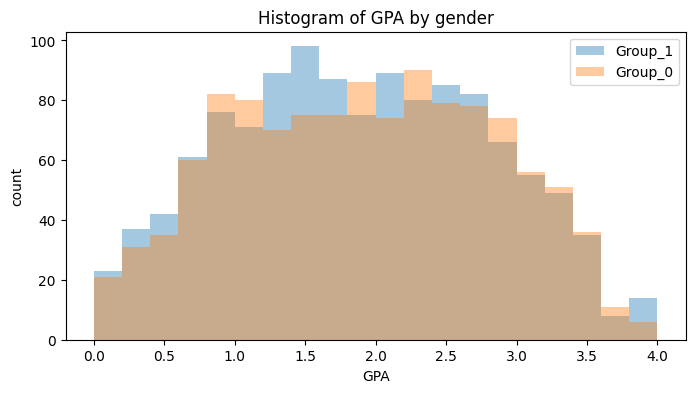

In [42]:
if 'gender_label' in df.columns and 'GPA' in df.columns:
    plt.figure()
    for g in df['gender_label'].unique():
        subset = df[df['gender_label']==g]['GPA']
        plt.hist(subset, bins=20, alpha=0.4, label=str(g))
    plt.xlabel('GPA'); plt.ylabel('count'); plt.title('Histogram of GPA by gender'); plt.legend(); plt.show()

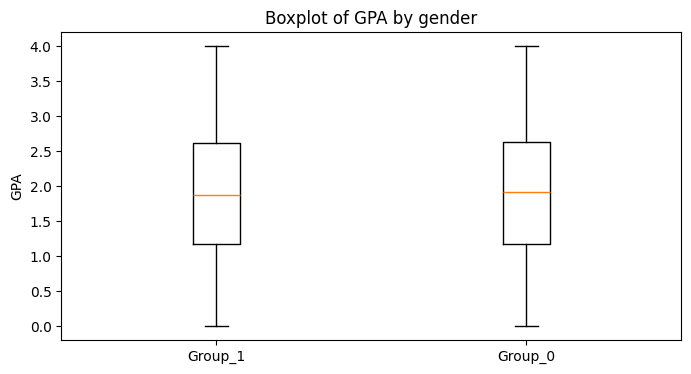

In [43]:
if 'gender_label' in df.columns and 'GPA' in df.columns:
    plt.figure()
    groups = [df[df['gender_label']==g]['GPA'] for g in df['gender_label'].unique()]
    plt.boxplot(groups, labels=df['gender_label'].unique()); plt.ylabel('GPA'); plt.title('Boxplot of GPA by gender'); plt.show()

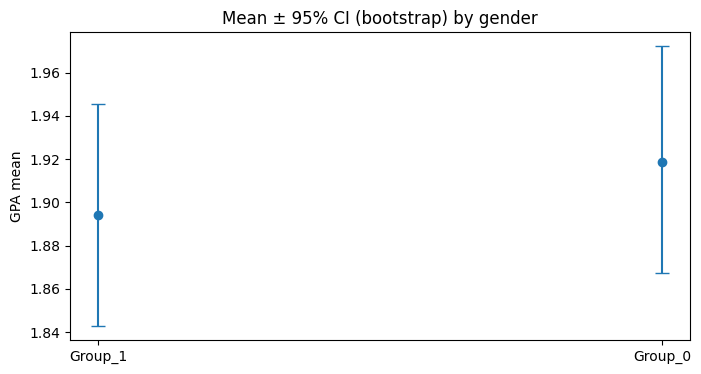

In [44]:
if 'gender_label' in df.columns and 'GPA' in df.columns:
    means = []
    errs = []
    labels = []
    rng = np.random.default_rng(0)
    for g in df['gender_label'].unique():
        grp = df[df['gender_label']==g]['GPA'].dropna()
        labels.append(g)
        means.append(grp.mean())
        boots = [rng.choice(grp, size=len(grp), replace=True).mean() for _ in range(2000)]
        ci = np.percentile(boots, [2.5,97.5])
        errs.append([means[-1]-ci[0], ci[1]-means[-1]])
    means = np.array(means); errs = np.array(errs).T
    x = np.arange(len(labels))
    plt.figure(); plt.errorbar(x, means, yerr=errs, fmt='o', capsize=5); plt.xticks(x, labels); plt.ylabel('GPA mean'); plt.title('Mean ± 95% CI (bootstrap) by gender'); plt.show()

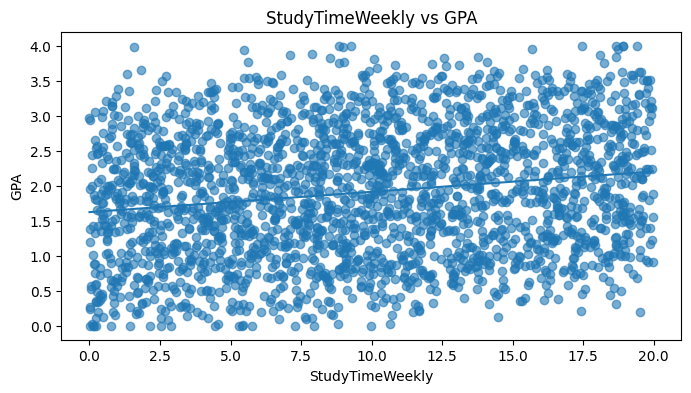

In [45]:
if 'StudyTimeWeekly' in df.columns and 'GPA' in df.columns:
    df_sc = df[['StudyTimeWeekly','GPA']].dropna()
    x = df_sc['StudyTimeWeekly'].to_numpy(); y = df_sc['GPA'].to_numpy()
    plt.figure(); plt.scatter(x, y, alpha=0.6)
    try:
        m,b = np.polyfit(x,y,1)
        xp = np.linspace(x.min(), x.max(), 100)
        plt.plot(xp, m*xp + b)
    except Exception:
        pass
    plt.xlabel('StudyTimeWeekly'); plt.ylabel('GPA'); plt.title('StudyTimeWeekly vs GPA'); plt.show()

## Conclusões

- **H1 (GPA por gênero):** teste não encontrou evidência de diferença entre os dois grupos (p > 0.05). O IC bootstrap para a diferença de médias contém 0.

- **H2 (StudyTimeWeekly × GPA):** correlação positiva e estatisticamente significativa (Spearman rho). IC bootstrap para rho não inclui 0.

---

### Arquivos gerados neste diretório:
- `summary_hypothesis_tests_notebook.csv` — resumo dos testes e estatísticas.
- `Inferência Estatística.ipynb` — este notebook.